## Two-Pointer

Check out `review/tech_interviews/two-pointer.ipynb` to learn about the two pointer pattern.

## Setup

Install the following packages via pip:

```
pip install geopandas
pip install plotly
pip install pyshp
pip install shapely
pip install plotly-geo
pip install scipy
pip install scikit-learn
```

## EDA

* What exactly is EDA?
* As opposed to discrete steps, EDA is simply the process of poking & prodding your data to see what sorts of insights fall out of it
* Before starting, we want to ensure that the data is properly cleaned & formatted.
* EDA entails:
* Viewing your data
    * Splitting your data into groups
    * Calculating statistics
    * Performing t-tests
    * And most importantly, visualizing your data
In no specific order


In [7]:
import pandas as pd

# load in rental data
# this will not be the only dataframe we interact with! always split your dataframes into further groups
rent_df = pd.read_csv("../data/2020_2021_rent.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 961: invalid start byte

Let's propose a goal for analysis
* view trends in rent
* view trends in population
* view how rent changed from state-to-state 
  * anymore granular?...
* view how rent correlates with population

* business applications? 
  * market-rate and what they can charge
  * trends in population --> market opps

* consumer applications?
  * landlord falsification
  * finding a new place to live. Alaska??? 

In [8]:
# we often run into the errors above. This indicates that there is some non-unicode character in our dataset.
# could be cyrillic, could be expanded latin (accented chars), could be mandarin, etc.

# regardless, we can fix it by switching the encoding.
rent_df = pd.read_csv("../data/2020_2021_rent.csv", encoding = 'unicode_escape')

# any risks to this? ... 

In [9]:
# let's view the first 5 rows to get a sense of the type of data to expect
rent_df.head(6)

year    fips2010  rent50_0  rent50_1  rent50_2  rent50_3  rent50_4  state  \
0  2020  4805999999       673       699       920      1209      1560     48   
1  2020  4825399999       673       699       920      1209      1560     48   
2  2020  4844199999       673       699       920      1209      1560     48   
3  2020  7200399999       386       397       452       591       713     72   
4  2020  7200599999       386       397       452       591       713     72   
5  2020  7201199999       386       397       452       591       713     72   

          cbsasub20                                areaname20  county  cousub  \
0  METRO10180M10180                           Abilene, TX MSA      59   99999   
1  METRO10180M10180                           Abilene, TX MSA     253   99999   
2  METRO10180M10180                           Abilene, TX MSA     441   99999   
3  METRO10380M10380  Aguadilla-Isabela, PR HUD Metro FMR Area       3   99999   
4  METRO10380M10380  Aguadilla-Isabela, PR HUD Metro FMR Area       5   99999   
5  METRO10380M10380  Aguadilla-Isabela, PR HUD Metro FMR Area      11   99999   

              cntyname                 name  pop2017  hu2017 state_alpha  
0      Callahan County      Callahan County    13660    6637          TX  
1         Jones County         Jones County    19970    7292          TX  
2        Taylor County        Taylor County   135370   56978          TX  
3     Aguada Municipio     Aguada Municipio    39470   17385          PR  
4  Aguadilla Municipio  Aguadilla Municipio    55720   27301          PR  
5     A¤asco Municipio     A¤asco Municipio    27890   12557          PR

In [10]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         9533 non-null   int64 
 1   fips2010     9533 non-null   int64 
 2   rent50_0     9533 non-null   int64 
 3   rent50_1     9533 non-null   int64 
 4   rent50_2     9533 non-null   int64 
 5   rent50_3     9533 non-null   int64 
 6   rent50_4     9533 non-null   int64 
 7   state        9533 non-null   int64 
 8   cbsasub20    9533 non-null   object
 9   areaname20   9533 non-null   object
 10  county       9533 non-null   int64 
 11  cousub       9533 non-null   int64 
 12  cntyname     9533 non-null   object
 13  name         9533 non-null   object
 14  pop2017      9533 non-null   int64 
 15  hu2017       9533 non-null   int64 
 16  state_alpha  9533 non-null   object
dtypes: int64(12), object(5)
memory usage: 1.2+ MB


In [11]:
# we fix format if necessary, rename columns 
# data munging: prepare for analysis

# consider your goals...

# view trends in rent (which column do we need for this?)
# view trends in population (which column do we need for this as well?)

# view how rent changed from state-to-state (which column is relevant for this?)
  # anymore granular?... (granular data)
# view how rent correlates with population

# looks like we only need to focus in on a few columns for our analysis
rentpop_df = rent_df[["year", "fips2010", "rent50_0", "county", "areaname20", "name", "pop2017", "state_alpha"]]

# drop null values (if relevant)


# view new dataframe
rentpop_df.head()

year    fips2010  rent50_0  county  \
0  2020  4805999999       673      59   
1  2020  4825399999       673     253   
2  2020  4844199999       673     441   
3  2020  7200399999       386       3   
4  2020  7200599999       386       5   

                                 areaname20                 name  pop2017  \
0                           Abilene, TX MSA      Callahan County    13660   
1                           Abilene, TX MSA         Jones County    19970   
2                           Abilene, TX MSA        Taylor County   135370   
3  Aguadilla-Isabela, PR HUD Metro FMR Area     Aguada Municipio    39470   
4  Aguadilla-Isabela, PR HUD Metro FMR Area  Aguadilla Municipio    55720   

  state_alpha  
0          TX  
1          TX  
2          TX  
3          PR  
4          PR

In [12]:
# next, we explore the metadata (cols, type, len, missing vals) to understand the struct of our df
rentpop_df.columns

Index(['year', 'fips2010', 'rent50_0', 'county', 'areaname20', 'name',
       'pop2017', 'state_alpha'],
      dtype='object')

In [13]:
# make summary statistics
rentpop_df.describe()

year      fips2010     rent50_0       county       pop2017
count  9533.000000  9.533000e+03  9533.000000  9533.000000  9.533000e+03
mean   2020.499948  3.044543e+09   723.536347    74.330956  6.825536e+04
std       0.500026  1.505724e+09   279.589952    99.108654  2.677306e+05
min    2020.000000  1.002000e+08   337.000000     1.000000  0.000000e+00
25%    2020.000000  2.107600e+09   539.000000    13.000000  3.985000e+03
50%    2020.000000  2.711000e+09   641.000000    37.000000  1.493500e+04
75%    2021.000000  4.213200e+09   806.000000   105.000000  4.132000e+04
max    2021.000000  7.803100e+09  2447.000000   999.000000  1.010572e+07

In [14]:
# tukey's numbers min, lower quant, median, upper quant, max (http://theurbanengine.com/blog//tukey-5-number-summary)
# let's focus in on the columns of interest (rent & pop?)
rentpop_df[['rent50_0','pop2017']].describe()

rent50_0       pop2017
count  9533.000000  9.533000e+03
mean    723.536347  6.825536e+04
std     279.589952  2.677306e+05
min     337.000000  0.000000e+00
25%     539.000000  3.985000e+03
50%     641.000000  1.493500e+04
75%     806.000000  4.132000e+04
max    2447.000000  1.010572e+07

In [ ]:
# describe the pop2017 column


In [15]:
# create two dataframes. one describing 2020 data and one describing 2021 data

# filter for 2020
df_2020 = rent_df[rent_df['year'] == 2020]

# filter for 2021
df_2021 = rent_df[rent_df['year'] == 2021]

In [16]:
# summary statistics of rent50 for 2020
df_2020["rent50_0"].describe()

count    4767.000000
mean      709.632893
std       273.928743
min       338.000000
25%       529.000000
50%       625.000000
75%       785.500000
max      2288.000000
Name: rent50_0, dtype: float64

In [17]:
# summary statistics of rent50 for 2021
df_2021["rent50_0"].describe()

count    4766.000000
mean      737.442719
std       284.489672
min       337.000000
25%       547.000000
50%       645.000000
75%       821.000000
max      2447.000000
Name: rent50_0, dtype: float64

2020         AxesSubplot(0.1,0.15;0.363636x0.75)
2021    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

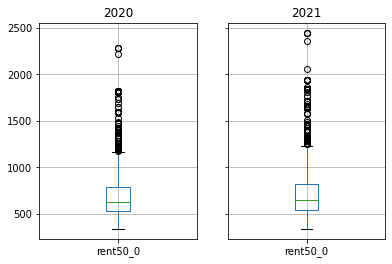

In [18]:
# let's generate some boxplots to beter visualize this
# if we would multiple boxplots according to the value in a row, we must use groupby
# and specify a column
rentpop_df.groupby("year").boxplot(column='rent50_0')

2020         AxesSubplot(0.1,0.15;0.363636x0.75)
2021    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

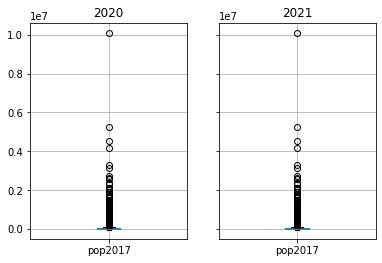

In [19]:
rentpop_df.groupby("year").boxplot(column='pop2017')

<AxesSubplot:ylabel='Frequency'>

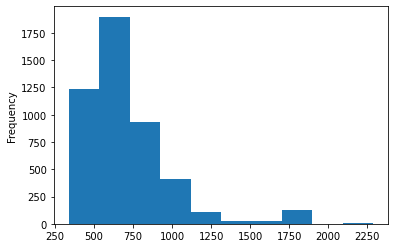

In [20]:
# look at distributions for your columns of interest, consider if they follow any 
# distribution pattern?
df_2020["rent50_0"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

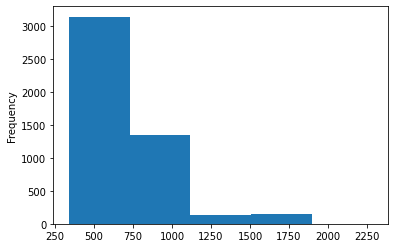

In [21]:
# make a histogram using only 5 bins
# how do bins change observations?
df_2020["rent50_0"].plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

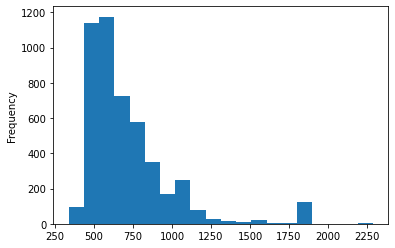

In [22]:
# what kind of distribution might this be? 
# https://chartio.com/assets/7fe114/tutorials/charts/histograms/64918b209c6e60b56bee9d8c7ba22dcd854370078e6b8377f272c85119080728/histogram-example-2.png

# generally speaking the more bins you have, the more insight you can glean
df_2020["rent50_0"].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

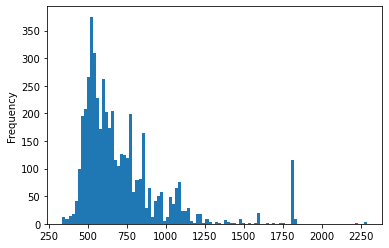

In [23]:
# a lot of bins communicate even more info

# how many bins you include is contextual on the purpose of EDA
# find classes/groups of data? Less bins
# analyze continuous data? More bins

df_2020["rent50_0"].plot.hist(bins=100)

30


<AxesSubplot:ylabel='Frequency'>

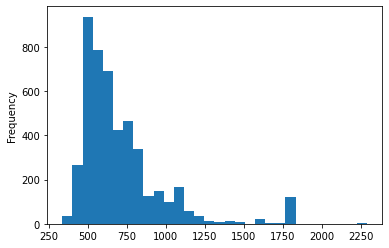

In [24]:
# there is a rule we can use however: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

# Python does not have a builtin method for this, but R does (https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram)
# this is why R is usually a go-to for data-analysis

# however, we will make do
# 2 * IQR * len(df)**(-1/3)

first_quart = df_2020["rent50_0"].describe()["25%"]
third_quart = df_2020["rent50_0"].describe()["75%"]
iqr = third_quart - first_quart

# why do we cast it to an int?
opt_bins = int(2 * iqr * len(df_2020["rent50_0"])**(-1/3))
print(opt_bins)

df_2020["rent50_0"].plot.hist(bins=opt_bins)

32


<AxesSubplot:ylabel='Frequency'>

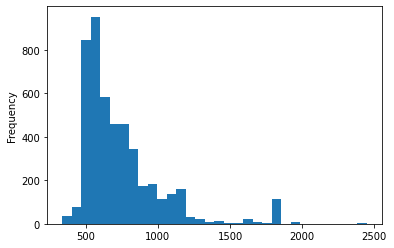

In [26]:
# calculate the optimal amount of bins according to the  https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule for 2021 and plot

first_quart = df_2021["rent50_0"].describe()["25%"]
third_quart = df_2021["rent50_0"].describe()["75%"]
iqr = third_quart - first_quart

# why do we cast it to an int?
opt_bins = int(2 * iqr * len(df_2021["rent50_0"])**(-1/3))
print(opt_bins)

df_2021["rent50_0"].plot.hist(bins=opt_bins)

25


<AxesSubplot:ylabel='Frequency'>

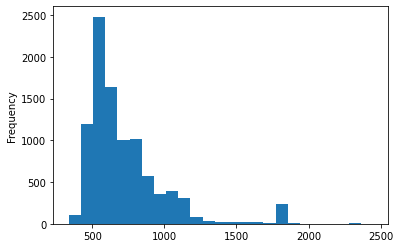

In [27]:
# calculate the optimal amount of bins according to the  https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule for the entire dataframe (original df containing 2020 & 2021 data) and plot
first_quart = rentpop_df["rent50_0"].describe()["25%"]
third_quart = rentpop_df["rent50_0"].describe()["75%"]
iqr = third_quart - first_quart

# why do we cast it to an int?
opt_bins = int(2 * iqr * len(rentpop_df["rent50_0"])**(-1/3))
print(opt_bins)

rentpop_df["rent50_0"].plot.hist(bins=opt_bins)

C:\Users\saidmf\AppData\Local\Temp\ipykernel_10048\1311115069.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_2004_2021 = df_2021["rent50_0"].append(rent2004["Rent50_0"])


<AxesSubplot:ylabel='Frequency'>

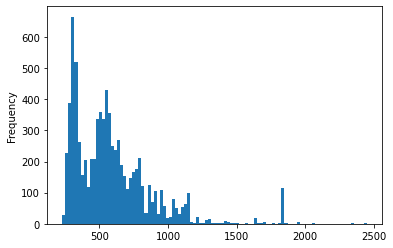

In [28]:
# let's see what happens when there are clearly two-classes of data
# load in 2004 rent data
rent2004 = pd.read_csv("../data/2004rent.csv")
# attach to 2021 data
rent_2004_2021 = df_2021["rent50_0"].append(rent2004["Rent50_0"])

# what do we notice about this histogram?
rent_2004_2021.plot.hist(bins=100)

# bi-modal --> multiple classes of data
# potentially want to split our dataframe

<AxesSubplot:ylabel='Frequency'>

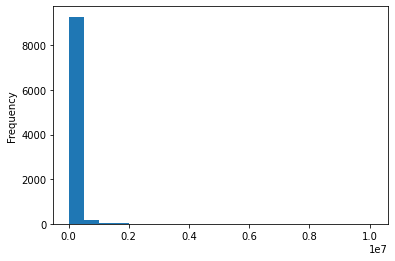

In [29]:
# quickly analyze population
rentpop_df["pop2017"].plot.hist(bins=20)

<AxesSubplot:xlabel='pop2017', ylabel='rent50_0'>

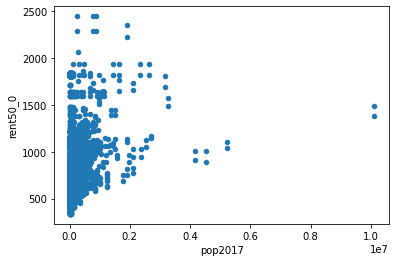

In [30]:
# after viewing distributions, let's try to compare correlation between population & rent
rentpop_df.plot.scatter(x="pop2017", y="rent50_0")

<AxesSubplot:xlabel='pop2017', ylabel='rent50_0'>

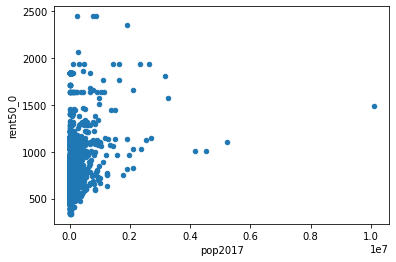

In [31]:
# do the same for 2021 data
df_2021.plot.scatter(x="pop2017", y="rent50_0")

<AxesSubplot:xlabel='pop2017', ylabel='rent50_0'>

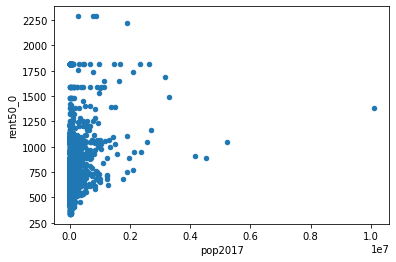

In [32]:
# do the same for 2020 data
df_2020.plot.scatter(x="pop2017", y="rent50_0")

In [34]:
# We could also perform t-tests to view the validity of hypothesis
# null-hypothesis: that exercise does not have effect on avg weight. the hypothesis is false. 
    # states that there is no effect between the two-groups. We are assuming the status-quo. 
# alt-hypothesis: that there is an effect between the two-groups

# central limit theorem: ...

# we could potentially do a distribution test called the `kolmogorov-smirnov test'
# which is a hypothesis test that checks if some data-sample is normally distributed

# if it is normally distributed, then we have a good dataset to predict on using an explainable model
# such as linear regression

# if it is not normally distributed, then we should probably scale our data to make it normal
# or choose a different model
# or snip outliers

# https://pyshark.com/test-for-normality-using-python/
# https://www.bristol.ac.uk/cmm/media/research/ba-teaching-ebooks/pdf/Normality%20-%20Practical.pdf

# We use the k-s test to check if our distribution matches some other distribution
# for example, normal

# our null-hypothesis is that the distribution is normal
# while our alt-hypothesis is that our distribution is not normal (skewed, possion, uniform)

# keep in mind, that we reject the null-hypothesis if our p-value is less than 0.05

from scipy import stats

stats.kstest(rentpop_df["rent50_0"], stats.norm.cdf)


KstestResult(statistic=1.0, pvalue=0.0)

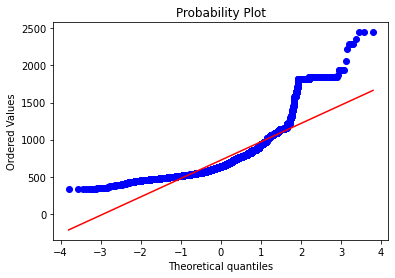

In [35]:
# and lastly, one more visualization to check for normality
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(rentpop_df["rent50_0"], dist="norm", plot=plt)
plt.show()

While rent data is not normal (harder prediction task), we could apply some transformation tasks to force it to be normal (https://developers.google.com/machine-learning/data-prep/transform/normalization)

We use the transformation that works "empirically" well. Are there any risks to this?

In [59]:
# generally we normalize columns together. The scale for population and rent is often varied
# ex: rent 635 USD, population 83,000 people. Two different scales

# this is also known as "scaling to range"
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# why do we only focus on these columns?
rentpop2021_reduced = df_2021[['rent50_0', 'pop2017']]

scaled_data = scaler.fit_transform(rentpop2021_reduced)
rentpop_scaled = pd.DataFrame(scaled_data, columns=rentpop2021_reduced.columns)

rentpop_scaled.head()

rent50_0   pop2017
0  0.200948  0.001352
1  0.200948  0.001976
2  0.200948  0.013395
3  0.030332  0.003906
4  0.030332  0.005514

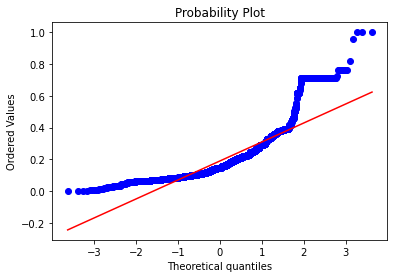

In [60]:
# let's view distribution now via the QQ plot
stats.probplot(rentpop_scaled["rent50_0"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:xlabel='year', ylabel='rent50_0'>

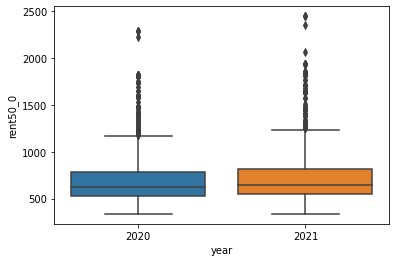

In [37]:
# matplotlib is great for making internal plots to share amongst yourselves and collegues
# but in reality we'd much rather prefer something with more pizzazz , or at least more colors
# therefore we use `seaborn`. https://seaborn.pydata.org/
import seaborn as sns 

# boxplots to analyze distribution
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=rentpop_df, x="year", y="rent50_0")


In [ ]:
# filtering your dataframe on only one state and create a boxplot for this state


<AxesSubplot:xlabel='pop2017', ylabel='rent50_0'>

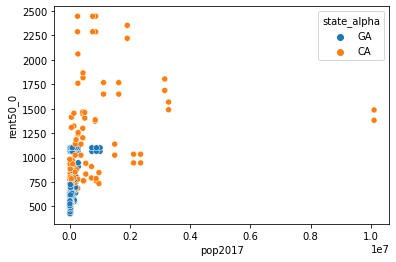

In [38]:
# scatter plots to visualize trends
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

# focus on GA & NY
rentpop_south = rentpop_df[
    (rentpop_df["state_alpha"] == 'GA') | 
    (rentpop_df["state_alpha"] == 'CA')
    ]

sns.scatterplot(data=rentpop_south, x="pop2017", y="rent50_0", hue="state_alpha")

In [ ]:
# filter your data on two distinct states and create a scatter plot


<AxesSubplot:xlabel='state_alpha', ylabel='rent50_0'>

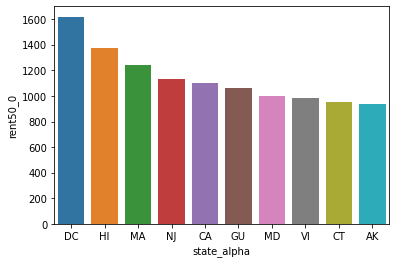

In [61]:
# bar graphs to visualize rank by groups
# https://seaborn.pydata.org/generated/seaborn.barplot.html
means = rentpop_df.groupby("state_alpha").mean()["rent50_0"].reset_index()
sorted_means = means.sort_values(by="rent50_0", ascending=False)

sns.barplot(x="state_alpha", y="rent50_0", data=sorted_means.head(10))

In [65]:
# lastly, our analysis can get us complex as our goals

pivoted_table = df_2021.merge(df_2020, how='left', on=['name'])
pivoted_table.columns

Index(['year_x', 'fips2010_x', 'rent50_0_x', 'rent50_1_x', 'rent50_2_x',
       'rent50_3_x', 'rent50_4_x', 'state_x', 'cbsasub20_x', 'areaname20_x',
       'county_x', 'cousub_x', 'cntyname_x', 'name', 'pop2017_x', 'hu2017_x',
       'state_alpha_x', 'year_y', 'fips2010_y', 'rent50_0_y', 'rent50_1_y',
       'rent50_2_y', 'rent50_3_y', 'rent50_4_y', 'state_y', 'cbsasub20_y',
       'areaname20_y', 'county_y', 'cousub_y', 'cntyname_y', 'pop2017_y',
       'hu2017_y', 'state_alpha_y'],
      dtype='object')

<AxesSubplot:xlabel='state_alpha_x', ylabel='delta_rent'>

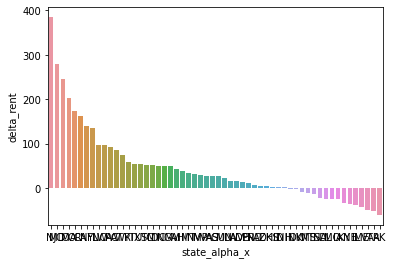

In [70]:
# calculate difference from year to year 
pivoted_table["delta_rent"] = pivoted_table["rent50_0_x"] - pivoted_table["rent50_0_y"]

# calc mean difference across state
means_delta = pivoted_table.groupby("state_alpha_x").mean()["delta_rent"].reset_index()

sorted_means_delta = means_delta.sort_values(by="delta_rent", ascending=False)

sns.barplot(x="state_alpha_x", y="delta_rent", data=sorted_means_delta)

<AxesSubplot:xlabel='state_alpha_x', ylabel='delta_rent'>

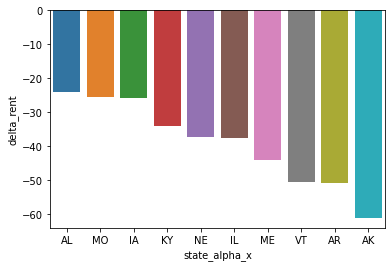

In [67]:
sns.barplot(x="state_alpha_x", y="delta_rent", data=sorted_means_delta.tail(10))

In [68]:
pivoted_table["fips_corrected"] = [str(fip)[:5] for fip in list(pivoted_table["fips2010_x"])]
pivoted_table.to_csv("pivot_year.csv", index=False)

In [ ]:
# re-consider your goals...

# view trends in rent (which column do we need for this?)
  # what did rent from 2020 - 2021? it increased (for most states)
# view trends in population (which column do we need for this as well?)
  

# view how rent changed from state-to-state (which column is relevant for this?)
  # anymore granular?... (granular data)
# view how rent correlates with population
  # there MIGHT be a correlation between population and rent for certain categories of cities

# since data is not normally distributed
  # I want to apply a scalar
  # potentially remove outliers
  # use a multivariate regression model (that's more complex than linear regression)

In [ ]:
# finally do make a plan of action

## NEXT STEPS

## RISKS

## DOCUMENT!

## LOAD BACK IN 

If you'd like to try to create this chloropleth map,  we can run the following code-block.

Keep in mind, this function is deprecated, so we will see how to create this Tableau instead: https://plotly.com/python-api-reference/generated/plotly.figure_factory.create_choropleth.html

In [69]:
import plotly.io as pio
pio.renderers.default='notebook'

import plotly.figure_factory as ff
import pandas as pd

# surpress warnings
import warnings
warnings.filterwarnings("ignore")

rent_df = pd.read_csv("../data/2020_2021_rent.csv", encoding = 'unicode_escape')

# looks like we only need to focus in on a few columns for our analysis
rentpop_df = rent_df[["year", "fips2010", "rent50_0", "county", "areaname20", "name", "pop2017", "state_alpha"]]

rentpop2021 = rentpop_df[rentpop_df["year"] == 2021]

# and lastly, there is an entire field simply dedicated to plotting geographic data
# GIS: https://www.cdc.gov/gis/what-is-gis.htm

# get first 5 digits of each fip_code
fip_code = list(rentpop2021["fips2010"])
str_fip = [str(fip)[:5] for fip in fip_code]

# we can simulate this via plotly
fig = ff.create_choropleth(fips=str_fip, values=list(rentpop2021["rent50_0"]))
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# a more interesting visualization would perhaps be the `delta` or the `difference` in rent prices ... 
rentpop2020 = rentpop_df[rentpop_df["year"] == 2020]
pivoted_table  = rentpop2021.merge(rentpop2020, how='left', on=['areaname20', 'county'])
pivoted_table.head()

year_x  fips2010_x  rent50_0_x  county  \
0    2021  4805999999         761      59   
1    2021  4825399999         761     253   
2    2021  4844199999         761     441   
3    2021  7200399999         401       3   
4    2021  7200599999         401       5   

                                 areaname20               name_x  pop2017_x  \
0                           Abilene, TX MSA      Callahan County      13660   
1                           Abilene, TX MSA         Jones County      19970   
2                           Abilene, TX MSA        Taylor County     135370   
3  Aguadilla-Isabela, PR HUD Metro FMR Area     Aguada Municipio      39470   
4  Aguadilla-Isabela, PR HUD Metro FMR Area  Aguadilla Municipio      55720   

  state_alpha_x  year_y    fips2010_y  rent50_0_y               name_y  \
0            TX  2020.0  4.806000e+09       673.0      Callahan County   
1            TX  2020.0  4.825400e+09       673.0         Jones County   
2            TX  2020.0  4.844200e+09       673.0        Taylor County   
3            PR  2020.0  7.200400e+09       386.0     Aguada Municipio   
4            PR  2020.0  7.200600e+09       386.0  Aguadilla Municipio   

   pop2017_y state_alpha_y  
0    13660.0            TX  
1    19970.0            TX  
2   135370.0            TX  
3    39470.0            PR  
4    55720.0            PR

In [ ]:
pivoted_table["delta"] = pivoted_table["rent50_0_x"] - pivoted_table["rent50_0_y"]

fip_code = list(pivoted_table["fips2010_x"])
str_fip = [str(fip)[:5] for fip in fip_code]
pivoted_table["delta"]

In [52]:
# plot differences via ...
fip_code = list(pivoted_table["fips2010_x"])
str_fip = [str(fip)[:5] for fip in fip_code]

fig = ff.create_choropleth(fips=str_fip, values=list(pivoted_table["delta_rent"]))
fig.show()

# should work ... needs debugging

KeyboardInterrupt: 